In [1]:
# libararies to be used
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [3]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")


In [4]:
df = pd.concat([train, test], ignore_index=True)

In [5]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
##Eda

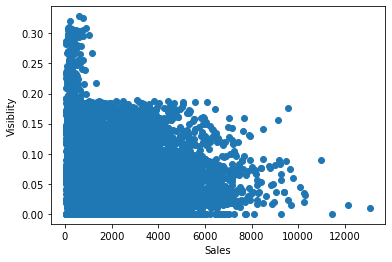

In [8]:
plt.scatter(df["Item_Outlet_Sales"], df['Item_Visibility'])
plt.xlabel("Sales")
plt.ylabel("Visiblity")
plt.show()

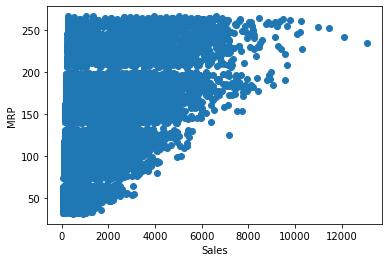

In [9]:
plt.scatter(df["Item_Outlet_Sales"], df['Item_MRP'])
plt.xlabel("Sales")
plt.ylabel("MRP")
plt.show()

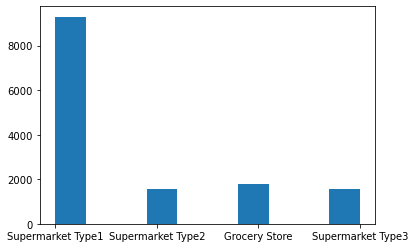

In [10]:
plt.hist(df['Outlet_Type'])
plt.show()

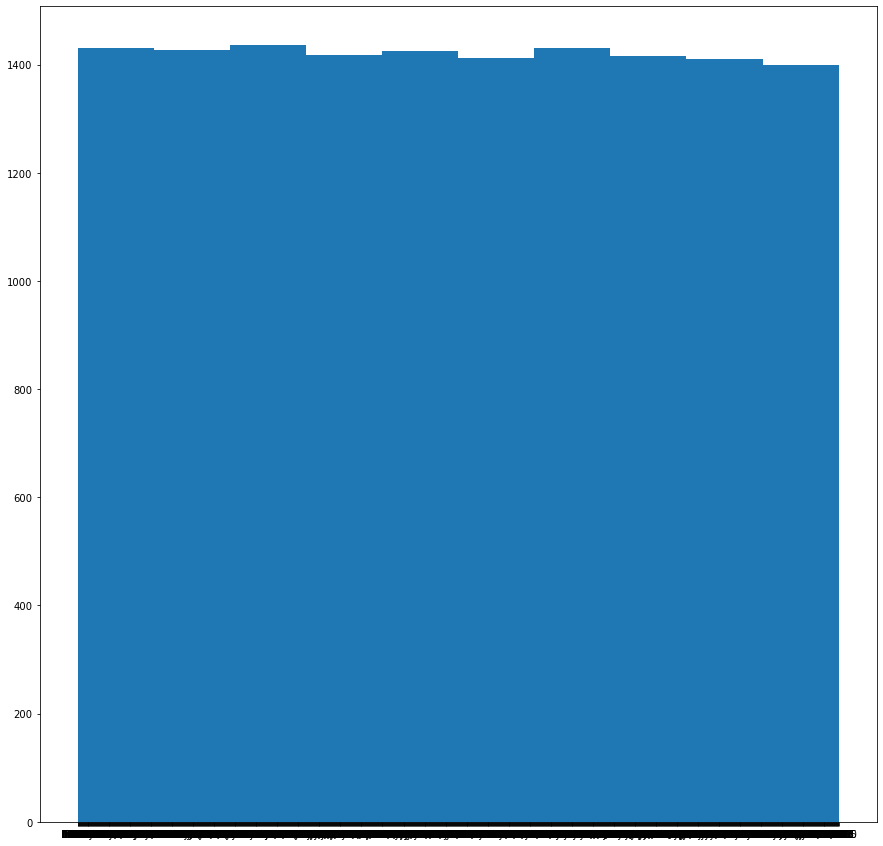

In [11]:
fig = plt.figure(figsize = (15,15))
plt.hist(df['Item_Identifier'])
plt.show()

In [12]:
#checking for duplicacy and dropping
df.duplicated().sum()

0

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

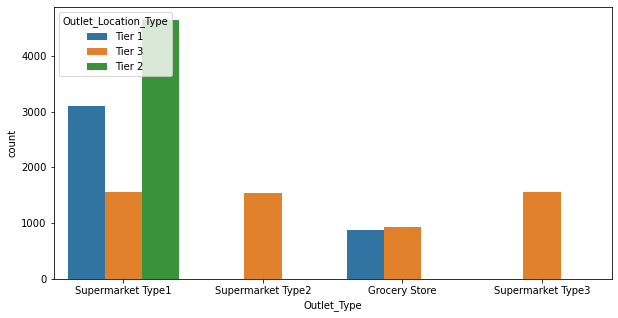

In [13]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Outlet_Type',data=df,hue='Outlet_Location_Type' )

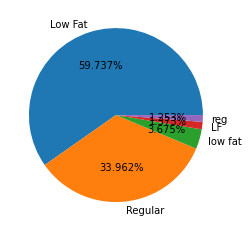

In [14]:
plt.pie(df['Item_Fat_Content'].value_counts(),
               labels = df['Item_Fat_Content'].unique(),
               autopct = '%0.3f%%');
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

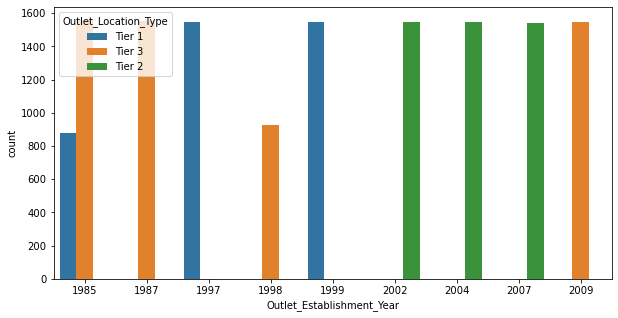

In [15]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Outlet_Establishment_Year',data=df,hue='Outlet_Location_Type' )

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

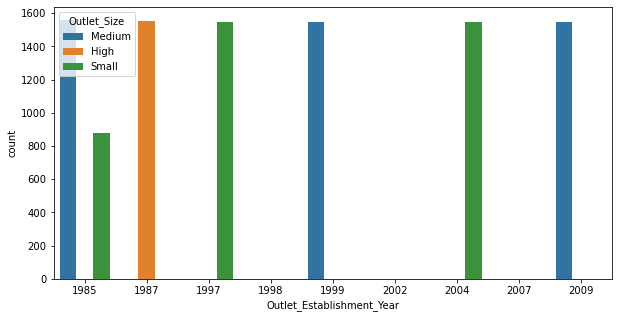

In [16]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Outlet_Establishment_Year',data=df,hue='Outlet_Size' )

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

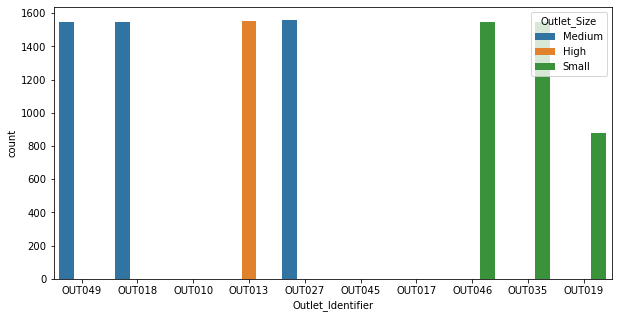

In [17]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Outlet_Identifier',data=df,hue='Outlet_Size' )

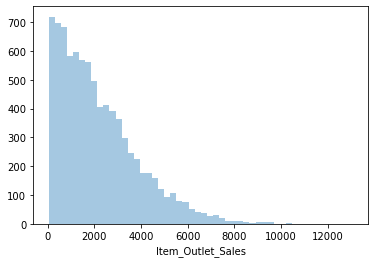

In [18]:
sns.distplot(df["Item_Outlet_Sales"], kde = False);

In [19]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [20]:
#Determine the average weight per item:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')
df2 = item_avg_weight.reset_index()
#Get a boolean variable specifying missing Item_Weight values
miss_bool = df['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))
a=df.loc[miss_bool,'Item_Weight'].index
for i in a:
    b=df.Item_Identifier[i]
    df['Item_Weight'][i]=df2.Item_Weight[df2['Item_Identifier']==str(b)]



Orignal #missing: 2439


In [21]:
print ('Final #missing: %d'% sum(df['Item_Weight'].isnull()))

Final #missing: 0


In [22]:
l=df['Outlet_Type'].unique()

for k in l:
    y=sum(df.Outlet_Size[(df['Outlet_Type']==k)].isna())
    if(y>0):
        x=df.Outlet_Size[(df['Outlet_Type']==k)].mode()
        Index=df.Outlet_Size.loc[(df['Outlet_Type']==k)].index
        for m in Index:
            df.Outlet_Size.iloc[m]=x[0]
    else:
        pass

In [23]:
print(sum(df['Outlet_Size'].isnull()))

0


In [24]:
#Determine average visibility of a product
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

df2 = visibility_avg.reset_index()

#Get a boolean variable specifying missing Item_Weight values

miss_bool = (df['Item_Visibility'] == 0) 

#Impute data and check #missing values before and after imputation to confirm

print('Orignal #missing: %d'% sum(miss_bool))
a=df.loc[miss_bool,'Item_Visibility'].index

for i in a:
    b=df.Item_Identifier[i]
    df['Item_Visibility'][i]=df2.Item_Visibility[df2['Item_Identifier']==str(b)]

print('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Orignal #missing: 879
Number of 0 values after modification: 0


In [25]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [26]:
#Years:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [27]:
#Change categories of low fat:
print ('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [28]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [29]:
#Import library:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#New variable for outlet
df['Outlet'] = label_encoder.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    df[i] = label_encoder.fit_transform(df[i])

In [32]:
#One Hot Coding:
data = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'],drop_first=True)

In [35]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [39]:
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.017834,182.0950,732.3800,15,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.009780,53.8614,994.7052,26,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,16,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,7.60,0.142991,169.1448,NaN,4,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14201,10.00,0.073529,118.7440,NaN,11,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
14202,15.30,0.088380,214.6218,NaN,6,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [40]:
col_names = ['Item_MRP', 'Outlet_Years', 'Item_Weight']
features = data[col_names]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [42]:
scaled_features

,Item_MRP,Outlet_Years,Item_Weight
0,1.752511,-0.139681,-0.751014
1,-1.493696,-1.334228,-1.477653
2,0.009874,-0.139681,1.011839
3,0.661838,-0.020226,1.377308
4,-1.403623,1.293777,-0.830557
...,...,...,...
14199,0.005000,0.099229,-0.493036
14200,0.453249,-1.334228,-1.116483
14201,-0.358558,-0.498045,-0.600527
14202,1.185747,-1.095319,0.538878


In [43]:
data['Item_MRP']=scaled_features['Item_MRP']
data['Outlet_Years']=scaled_features['Outlet_Years']
data['Item_Weight']=scaled_features['Item_Weight']
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.751014,0.016047,1.752511,3735.1380,-0.139681,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.477653,0.019278,-1.493696,443.4228,-1.334228,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.011839,0.016760,0.009874,2097.2700,-0.139681,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.377308,0.017834,0.661838,732.3800,-0.020226,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.830557,0.009780,-1.403623,994.7052,1.293777,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,-0.493036,0.013496,0.005000,NaN,0.099229,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,-1.116483,0.142991,0.453249,NaN,-1.334228,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14201,-0.600527,0.073529,-0.358558,NaN,-0.498045,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
14202,0.538878,0.088380,1.185747,NaN,-1.095319,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:


#Divide into test and train:
train = data[0:8523]
test = data[8523::]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [45]:
train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_1',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [98]:
test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4',
       'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [99]:
X = train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_1',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']]
Y = train['Item_Outlet_Sales']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [101]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0

l=[0.2,0.25,0.3]
for i in range(200):
    for j in l:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=j,
                                                    random_state=i)
        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
    
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,'test size',j)

R-square 0.5641942131590345 Random state 0 test size 0.2
R-square 0.5682678726346703 Random state 1 test size 0.3
R-square 0.5968690492178884 Random state 3 test size 0.2


In [103]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2, random_state =3)
linearRegressor = LinearRegression() 

In [104]:
linearRegressor.fit(x_train, y_train)
linearRegressor.intercept_

-2.5957329094291224e+16

In [105]:
yPrediction = linearRegressor.predict(x_test)
yPrediction

array([2864., 2048.,  532., ..., 3000., 2540.,  992.])

In [106]:
# predictions = scaler.inverse_transform(yPrediction.reshape(-1,1)).reshape(-1)
# y_test = scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1)

In [107]:
yPrediction

array([2864., 2048.,  532., ..., 3000., 2540.,  992.])

In [108]:
from sklearn.metrics import max_error
max_error(y_test,yPrediction)

6080.648999999999

In [109]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,yPrediction)

816.1354916129034

In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yPrediction)

1200435.139958683

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test,yPrediction)

0.5968690492178884

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
l=[0.2,0.25,0.3]
for i in range(200):
    for j in l:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=j,
                                                    random_state=i)
        ridge = Ridge()
        ridge.fit(x_train,y_train)
        pred= ridge.predict(x_test)
        acc=r2_score(y_test,pred)
    
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,'test size',j)

R-square 0.5641563210384326 Random state 0 test size 0.2
R-square 0.5682900009782523 Random state 1 test size 0.3
R-square 0.5968504284084872 Random state 3 test size 0.2


In [113]:
# Ridge Regression
ridge = Ridge()

parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)


x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2, random_state = 3)

ridge_regression.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [114]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 5}
-1294663.280572292


In [115]:
# prediction
ridge_pred = ridge_regression.predict(x_test)
ridge_pred = pd.DataFrame(ridge_pred, columns=['Predictions'])

In [116]:
from sklearn.metrics import max_error
max_error(y_test,ridge_pred )

6079.853756549378

In [117]:
r2_score(y_test,ridge_pred)

0.5968153140515113

In [118]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ridge_pred )

815.7849552164217

In [119]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ridge_pred)

1200595.1514434011

In [120]:
from sklearn.linear_model import Lasso

In [121]:
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x_train, y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-1294383.5055509175


In [122]:
lasso_pred = lasso_regression.predict(x_test)

In [123]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lasso_pred)

1200521.877494148

In [124]:
from sklearn.metrics import r2_score
r2_score(y_test,lasso_pred)

0.5968399209593289

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
parameters = {'bootstrap': [True],
 'max_depth': [5,7,9],
 'max_features': ['auto'],
 'n_estimators': [800,1000,1200]}
regr = RandomForestRegressor()

clf = GridSearchCV(regr, parameters, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 7, 9],
                         'max_features': ['auto'],
                         'n_estimators': [800, 1000, 1200]})

In [136]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 1000}
0.5882670846059239


In [137]:
y_pred_train = clf.predict(x_test)
r2_score(y_test,y_pred_train)

0.62642895678204

In [138]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squaredlogerror',],
              'learning_rate': [0.1,0.01,], #so called `eta` value
              'max_depth': [3,5,7,9],
              'n_estimators': [400,500,600,700]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(x_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[17:25:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [139]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.5862672948232742
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 700, 'objective': 'reg:linear'}


In [140]:
Xg_pred = xgb_grid.predict(x_test)
r2_score(y_test,Xg_pred)

0.6253423623090659

In [141]:
%%time
import pickle
# # saved the trained model in file with given name
pickle_out = open("big_data_random_forest.pickle","wb") # name of my pickle file , wb -write
pickle.dump(clf, pickle_out)
pickle_out.close()

Wall time: 83 ms


In [142]:
# loading the pickeled model
pickle_in = open("big_data_random_forest.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(test)

array([1738.9793687 , 1451.60701125,  673.17383049, ..., 1937.46081669,
       3698.93659569, 1344.3789045 ])

In [143]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("big_data_xgboost.pickle","wb") # name of my pickle file , wb -write
pickle.dump(clf, pickle_out)
pickle_out.close()

In [144]:
# loading the pickeled model
pickle_in = open("big_data_xgboost.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(test)

array([1738.9793687 , 1451.60701125,  673.17383049, ..., 1937.46081669,
       3698.93659569, 1344.3789045 ])